# Importing the Dependencies

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle as pk
import warnings
warnings.filterwarnings('ignore')

# Data collection and Analysing

 PIMA India diabetes dataset : [diabetes.csv](https://www.kaggle.com/johndasilva/diabetes/version/1)

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [52]:
#Loading the diabetes dataset into pandas dataframe
diabetes = pd.read_csv('/content/diabetes.csv')

In [53]:
#Printing the top 5 rows of diabetes dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [54]:
#Number of rows and columns in the dataset
diabetes.shape

(2000, 9)

In [55]:
#Checking the missing values in the dataset
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
#Getting some basic informations about the data
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [57]:
#Getting the statistical informations of data
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [58]:
#Finding the correlation between Features and Targets
diabetes.corr()['Outcome'][:-1]

Pregnancies                 0.224437
Glucose                     0.458421
BloodPressure               0.075958
SkinThickness               0.076040
Insulin                     0.120924
BMI                         0.276726
DiabetesPedigreeFunction    0.155459
Age                         0.236509
Name: Outcome, dtype: float64

In [59]:
#Finding the distributions of Outcome
diabetes['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

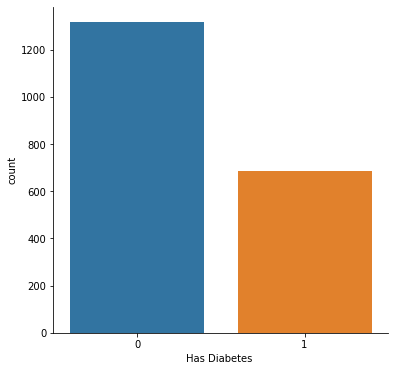

In [60]:
plt.figure(figsize=(6,6))
sns.countplot(diabetes['Outcome'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Has Diabetes ')
plt.show()

0 -> Non diabetic

1 -> Diabetic

In [61]:
#Finding the differences between Diabetic and non-diabetic persons
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


# Model Building

### Splitting Features and Targets

In [62]:
#Seperating data and labels
X = diabetes.drop(columns='Outcome', axis=1)
y = diabetes['Outcome']

In [63]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  
0                        0.127   47  
1                      

In [64]:
print(y)

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64


### Data Standardization

In [65]:
scaler = StandardScaler()

In [66]:
standardized_data = scaler.fit_transform(X)# You can also use fit and then use transform into two steps
print(standardized_data) # All the data will be in range of 0 to 1

[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]


In [67]:
#Saving standard deviation and mean
std = np.sqrt(scaler.var_)
np.save('diabetes_std.npy', std)

mean = scaler.mean_
np.save('diabetes_mean.npy', mean)

In [68]:
# Assigning standardized data into X
X = standardized_data

#Print X and y
print(X)
print(y)

[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]
0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64


Train Test Split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [70]:
print(X.shape,X_train.shape, X_test.shape)

(2000, 8) (1600, 8) (400, 8)


### Finding the Optimal Algorithm

In [71]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=2)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.777500
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.914375
2,random_forest,{'n_estimators': 100},0.955000
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.858125


In [72]:
# Using cross_val_score for gaining average accuracy
scores = cross_val_score(RandomForestClassifier(n_estimators=15, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


# Training the data

RandomForest Classifier

In [73]:
classifier = RandomForestClassifier(n_estimators=15)

In [74]:
#Training the Support vector Machine  Classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15)

### Model evaluation

Accuracy score

In [75]:
#Accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

print('Accuracy score of training data :  {:.2f}% '.format(training_data_accuracy*100))

Accuracy score of training data :  99.94% 


In [76]:
#Accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print("Accuracy score on test data : {:.2f}%  ".format(test_data_accuracy*100))

Accuracy score on test data : 97.50%  


### Confusion matrix

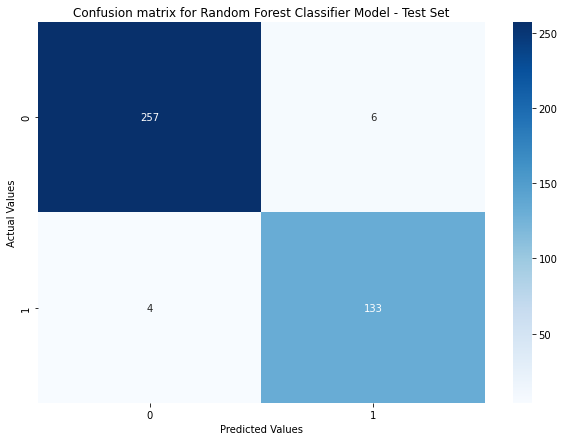

In [77]:
# Creating a confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Making Predictive System

In [78]:
#Creating a function for prediction
def diabetes_prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,BMI, DiabetesPedigreeFunction, Age):
  pregnancies = int(Pregnancies)
  glucose = float(Glucose)
  bp = float(BloodPressure)
  st = float(SkinThickness)
  insulin = float(Insulin)
  bmi = float(BMI)
  dpf = float(DiabetesPedigreeFunction)
  age = int(Age)
  x = [[pregnancies, glucose, bp, st, insulin, bmi, dpf, age]]
  x = scaler.transform(x)
  return classifier.predict(x)

In [79]:
prediction = diabetes_prediction(8,176,90,34,300,33.7,0.467,58)[0]
print(prediction)
if prediction:
   print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

1
Oops! You have diabetes.


## Saving Trained Model

In [80]:
filename = "diabetic_trained_model.pkl"
pk.dump(classifier, open(filename,'wb')) #wb means writing in binary form, dump function used to save the model

In [81]:
#Load the file 
Loaded_model = pk.load(open('diabetic_trained_model.pkl','rb'))

#Loading standard deviation and mean
std = np.load('diabetes_std.npy')
mean = np.load('diabetes_mean.npy')

In [82]:
#Creating a function for prediction
def diabetes_prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,BMI, DiabetesPedigreeFunction, Age):
  pregnancies = int(Pregnancies)
  glucose = float(Glucose)
  bp = float(BloodPressure)
  st = float(SkinThickness)
  insulin = float(Insulin)
  bmi = float(BMI)
  dpf = float(DiabetesPedigreeFunction)
  age = int(Age)
  x = [[pregnancies, glucose, bp, st, insulin, bmi, dpf, age]]
  x = (x-mean)/std
  return Loaded_model.predict(x)

In [83]:
prediction = diabetes_prediction(8,176,90,34,300,33.7,0.467,58)[0]
print(prediction)
if prediction:
   print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

1
Oops! You have diabetes.
